# Temas Selectos de Estadística
## Tarea 4
### José Antonio Duarte Mendieta

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import integrate
from scipy.special import airy

## Ejercicio 1

In [ ]:
t0 = 5
tn = -8
dx = .002

In [ ]:
t = np.arange(t0,tn, -dx)
t = np.append(t, -8)
def deq(t,y):
  return np.array([y[1], t*y[0]+2*y[0]**3, y[3], y[0]**2, -y[0]])
y0 = [airy(t0)[0], airy(t0)[1], 0, airy(t0)[0]**2, 0]
y = np.zeros((len(t), len(y0)))
y[0,:] = y0
r = integrate.ode(deq).set_integrator('dopri5', atol = 1e-15, rtol=1e-12, nsteps = 100000)
r.set_initial_value(y0, t0)
for i in range(1,t.size):
  y[i,:] = r.integrate(t[i])
F2=np.exp(-y[:,2])
f2 = np.gradient(F2, t)
F1 = np.sqrt(F2 * np.exp(-y[:,4]))
f1 = np.gradient(F1, t)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


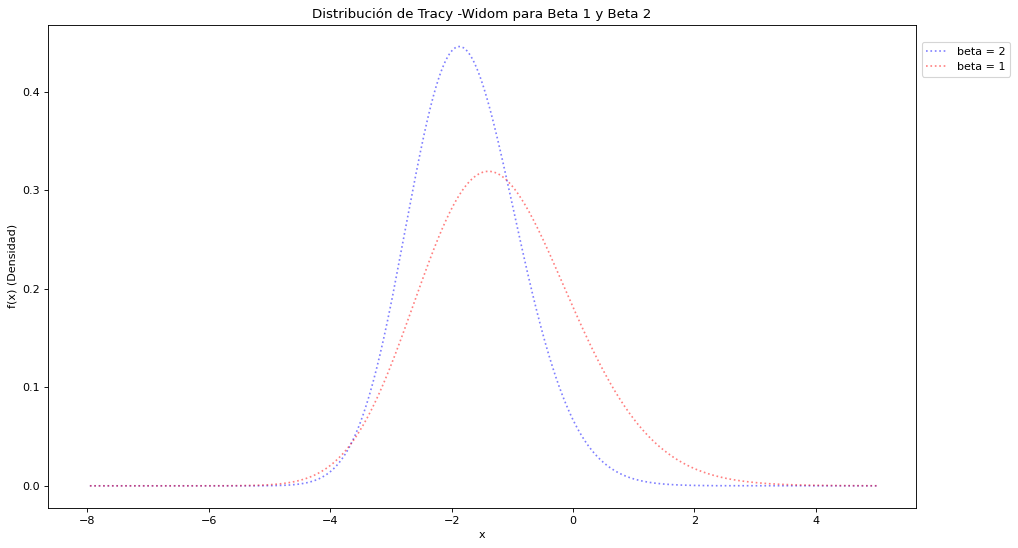

In [ ]:
figure(figsize=(14,8), dpi=80)
plt.plot(t,f2,ls= "dotted", color = "blue", alpha = 0.5, label=r"beta = 2")
plt.plot(t,f1,ls= "dotted", color = "red", alpha = 0.5, label=r"beta = 1")

ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('f(x) (Densidad)')
plt.title("Distribución de Tracy -Widom para Beta 1 y Beta 2")
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))


## Ejercicio 2

In [ ]:
%load_ext rpy2.ipython


In [ ]:
%%R
install.packages("RMTstat")
library(RMTstat)

In [ ]:
%%R
p = 10
n = 10
lam_1 = 4.3
mu_np = (sqrt(n) + sqrt(p))**2
sigma_np = mu_np * ((1/sqrt(n)+ 1/sqrt(p))**(1/3))
mu_np_o =(sqrt(n - 1/2) + sqrt(p-1/2))**2
sigma_np_o = (sqrt(n - 1/2) + sqrt(p-1/2))*((1/(sqrt(n-1/2)) + 1/(sqrt(p-1/2)))**(1/3))

La hipótesis nula es Ho se distribuye como una matriz Wishart con 10 grados de libertad y la identidad como varianza covarianza. Para saber si 4.3 es consistente con la hipótesis nula puede realizarse un test estadístico utilizando la ley de Tracy-Widom. 

Si no se utiliza la aproximación de segunda orden, se obtiene que el valor del estadístico es de 0.0873 y que la probabilidad de obtener un valor propio de 4.3 o más grande bajo la hipótesis nula es de 15%. Esto indicaría que no sería posible rechazar la hipótesis nula, sin embargo, los valores de $\mu_{np}$ y de $\sigma_{np}$ se calcularon utilizando el resultado asintótico. Como en este caso particular los valores de n y p son relativamente pequeños es necesario utilizar entonces la aproximación de segunda orden.

In [ ]:
t[2460]

0.08000000000054186

In [ ]:
1-F1[2460]

0.15400270543324313

A continuación se hace la comprobación con el paquete RMTstat

In [ ]:
%%R
print(ptw(1, beta=1, lower.tail = TRUE))

[1] 0.9514231


In [ ]:
%%R
estadistico = ((n * lam_1) - mu_np)/sigma_np
print(estadistico)
print(ptw(estadistico, beta=1, lower.tail = FALSE))

[1] 0.08737448
[1] 0.1527679


Recalculando los parámetros y obteniendo ahora $\mu_{np}^o$ y de $\sigma_{np}^o$ se obtiene que el valor del estadístico es de .9368 y que la probabilidad de obtener un valor propio de 4.3 o mayor bajo la hipótesis nula es de 0.0530. Es posible observar entonces que la probabilidad disminuye bastante con respecto a cuando no se utiliza la aproximación de segunda orden y que ahora sería posible rechazar la hipótesis nula bajo algunos casos. 

In [ ]:
t[2032]

0.9360000000004476

In [ ]:
1- F1[2032]

0.05306868158693856

A continuación se hace la comprobación con la librería RMTstat

In [ ]:
%%R
estadistico = ((n * lam_1) - mu_np_o)/sigma_np_o
print(estadistico)
print(ptw(estadistico, beta=1, lower.tail = FALSE))

[1] 0.9368904
[1] 0.05302342


Para un nivel de significancia del 1% es posible observar que el valor del estadístico tendría que ser de 2.022 o más. En este no caso se rechazaría la hipótesis nula. 

In [ ]:
t[1489]

2.022000000000328

In [ ]:
1 - F1[1489]

0.010001793040957385

Comprobación con el paquete RMTstat

In [ ]:
%%R
qtw(1-.01, beta=1, log = FALSE)

[1] 2.023335


Para un nivel de significancia del 5% se tiene que el valor del estadístico tendría que ser de 0.97 o más. En este caso no se rechazaría la hipótesis nula

In [ ]:
t[2011]

0.978000000000443

In [ ]:
1 - F1[2011]

0.050069851841729296

Comprobación con el paquete RMTstat

In [ ]:
%%R
qtw(1-.05, beta=1, log = FALSE)

[1] 0.9792895


Por último, para un nivel de significancia del 10%, se tiene que el valor del estadístico tendría que ser de 0.45 o más. Recordando que el valor del estadístco obtenido con la segunda aproximación de 0.93, en este caso sí se rechazaría la hipótesis nula. 

In [ ]:
t[2275]

0.4500000000005011

In [ ]:
1 - F1[2275]

0.09999696842731332

In [ ]:
%%R
qtw(1-.1, beta=1, log = FALSE)

[1] 0.4501291


La conclusión que puede derivarse de este ejercicio es que la diferencia entre usar la aproximación de segunda orden es bastante relevante cuando se está trabajando con matrices de dimensiones pequeñas, por lo que es necesario tener cuidado cuando se aplican este tipo de pruebas, verificando siempre los supuestos que hacen los resultados con respecto a las dimensiones de las matrices que se están utilizando. 

## Ejercicio 3

Retomando la simulación realizada para la simulación de la solución de Brown, es posible volver a realizar dicha simulación y sobreponer la simulación encontrada por Harding. Esto se lleva a cabo a continuación:

Se definen los parámetros y se elige una semilla aleatoria

In [ ]:
np.random.seed(seed=13)
sig_f_cuad= 0.000158
b = 1
sig_e_cuad = 0.0045
val_k = 4
sig_b_cuad = 0.01
p = list(range(50, 201))
n = 80

Se procede a realizar la simulación y obtener los valores propios más grandes para cada p

In [ ]:
# se crean placeholders para los resultados finales
medias_eigen = [[],[],[],[],[]]
quantil_75 = []
quantil_25 = []
for val_p in p:
    res_eigen_sup=[[],[],[],[],[]]
    traces_temp =[]
    for iter in range(0,10):    
        # se genera la matriz identidad de tamaño pxp
        identidad_p = np.identity(val_p)
        # se samplea aleatoriamente la matriz L utilizando la distribución especificada al principio de
        # este notebook
        matriz_L = np.random.normal(b, np.sqrt(sig_b_cuad), (val_p, val_k))
        matriz_F = np.random.normal(0, np.sqrt(sig_f_cuad), (val_k, n))
        matriz_E = np.random.normal(0, np.sqrt(sig_e_cuad), (val_p,n))
        matriz_R = np.matmul(matriz_L, matriz_F) + matriz_E
        matriz_S = 1 / n * (np.matmul(matriz_R, matriz_R.T))
        # Se calculan los valores propios
        eigenvals = np.real(np.around( np.linalg.eigvals(matriz_S), decimals=5))
        # Se ordenan los valores propios de mayor a menor
        eigenvals[::-1].sort()
        # se colocan los cinco valores propios más grandes en sus placeholders correspondientes
        for i in range(0,5):
            res_eigen_sup[i].append(eigenvals[i])
    # se obtienen los interquantiles
    quantil_75.append(np.quantile(res_eigen_sup[0], 0.75))
    quantil_25.append(np.quantile(res_eigen_sup[0], 0.25))
    
    for i in range(0,5):
        medias_eigen[i].append(np.mean(res_eigen_sup[i]))

Se obtiene la solución encontrada por Harding.

In [ ]:
# solución de harding

sol_harding = [[],[],[],[],[]]
for val_p in p:
  resultados_p = []
  resultados_p.append((val_p *sig_f_cuad*(sig_b_cuad +val_k * b**2)+sig_e_cuad)* (1+(1/n * (sig_e_cuad/(sig_f_cuad*(sig_b_cuad+ val_k*b**2))))))  
  if (val_p >= (1/n * (sig_e_cuad /(sig_f_cuad *sig_b_cuad))**2)):
    for val_i in range(1,val_k):
      resultados_p.append((val_p * sig_f_cuad * sig_b_cuad + sig_e_cuad)* (1+(1/n)*(sig_e_cuad / sig_f_cuad * sig_b_cuad)))
  else:
    for val_i in range(1,val_k):
      resultados_p.append(sig_e_cuad*(1+np.sqrt(val_p/n))**2)
  
  for val_j in range(val_k, val_p):
    resultados_p.append(sig_e_cuad*(1+np.sqrt(val_p/n))**2) 
  resultados_p.sort(reverse=True)
  cinco_top = resultados_p[0:5]
  for i in range(0,5):
    sol_harding[i].append(cinco_top[i])
  
  
sol_harding = np.array(sol_harding)

Se vuelve a obtener la solución de Brown

In [ ]:
# Solución de Brown
eigens_analitica = [[],[],[],[],[]]
var_explicada_5 = []
for val_p in p:
  resultados_p = []
  resultados_p.append(val_p * sig_f_cuad *(sig_b_cuad + val_k * b**2) + sig_e_cuad)  
  for val_i in range(1,val_k):
    resultados_p.append(val_p * sig_f_cuad * sig_b_cuad + sig_e_cuad)
  for val_j in range(val_k, val_p):
    resultados_p.append(sig_e_cuad) 
  resultados_p.sort(reverse=True)
  cinco_top = resultados_p[0:5]
  for i in range(0,5):
    eigens_analitica[i].append(cinco_top[i])
  var_explicada_5.append(np.sum(np.abs(cinco_top))*100)  
  


A continuación se grafica también la solución obtenida por Brown y por Harding en una misma gráfica para hacer más fácil la comparación con la solución de Harding. 

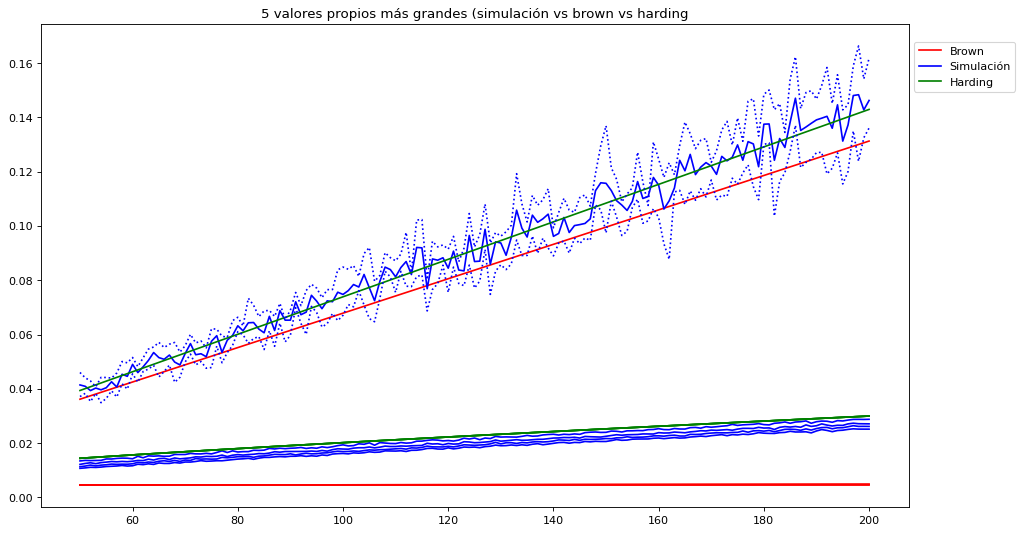

In [ ]:
figure(figsize=(14,8), dpi=80)
indix = 1
for ei in eigens_analitica:
    if indix == 1:
      plt.plot(p, ei, color = "red", label = "Brown")
    else:
      plt.plot(p, ei, color = "red")
    indix +=1
indix = 1
for ei in medias_eigen:
    
    if indix ==1:
      plt.plot(p, ei, color = "blue", label = "Simulación")
    else:
      plt.plot(p, ei, color = "blue")
    indix +=1
indix = 1
for ei in sol_harding:
  if indix == 1:
    plt.plot(p,ei,color="green", label = "Harding")
  else:
    plt.plot(p,ei,color="green")
  indix +=1
plt.plot(p,quantil_25,ls= "dotted", color ="blue")
plt.plot(p,quantil_75, ls = "dotted",color = "blue")
plt.title("5 valores propios más grandes (simulación vs brown vs harding")
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

Se puede observar que para el primer valor propio, la solución de Harding no está sesgada con respecto a la media de la simulación monte carlo, a diferencia de la solución encontrada por Brown. Para el resto de los valores propios, esta vez puede observarse que se encuentran por debajo del valor esperado (que esta dado por $\sigma_\epsilon^2 (1 + \sqrt{\frac{p}{n}})^2$. Es importante también notar que esta última expresión también es el límite superior de la ley de Marcenko Pastur. Esto es relevante debido a que esto indicaría que estos valores propios (del 2 al 4) son producto del ruido idiosincrático que se presenta al tener un portafolio con un número finito de observaciones y esto refutaría la idea del modelo de 4 factores. Esto implicaría que los test que se utilizan para identificar los valores propios que no son producto del ruido idiosicrático no funcionarían para los factores del 2 al 4, pues dichos test consideran que cualquier valor propio debajo de la cota superior de Marcenko Pastur es producto del ruido idiosincrático. En este contexto particular, esto implicaría que no sería posible identificar ningún componente/factor que no sea el primero (que ya se había relacionado anteriormente con el factor de mercado) mediante la técnica Componentes Principales.

In [ ]:
# solución de harding

sol_harding = [[],[],[],[],[]]
for val_p in p:
  resultados_p = []
  resultados_p.append((val_p *sig_f_cuad*(sig_b_cuad +val_k * b**2)+sig_e_cuad)* (1+(1/n * (sig_e_cuad/(sig_f_cuad*(sig_b_cuad+ val_k*b**2))))))  
  
  for val_i in range(1,val_k):
    resultados_p.append((val_p * sig_f_cuad * sig_b_cuad + sig_e_cuad)* (1+(1/n)*(sig_e_cuad / sig_f_cuad * sig_b_cuad)))
  
  for val_j in range(val_k, val_p):
    resultados_p.append((val_p * sig_f_cuad * sig_b_cuad + sig_e_cuad)* (1+(1/n)*(sig_e_cuad / sig_f_cuad * sig_b_cuad))) 
  resultados_p.sort(reverse=True)
  cinco_top = resultados_p[0:5]
  for i in range(0,5):
    sol_harding[i].append(cinco_top[i])
  
  
sol_harding = np.array(sol_harding)

El modelo original se recupera cuando $p \geq \frac{1}{n} (\frac{\sigma_\epsilon^2}{\sigma_f^2 * \sigma_b^2})^2$ como puede observarse en la siguiente gráfica

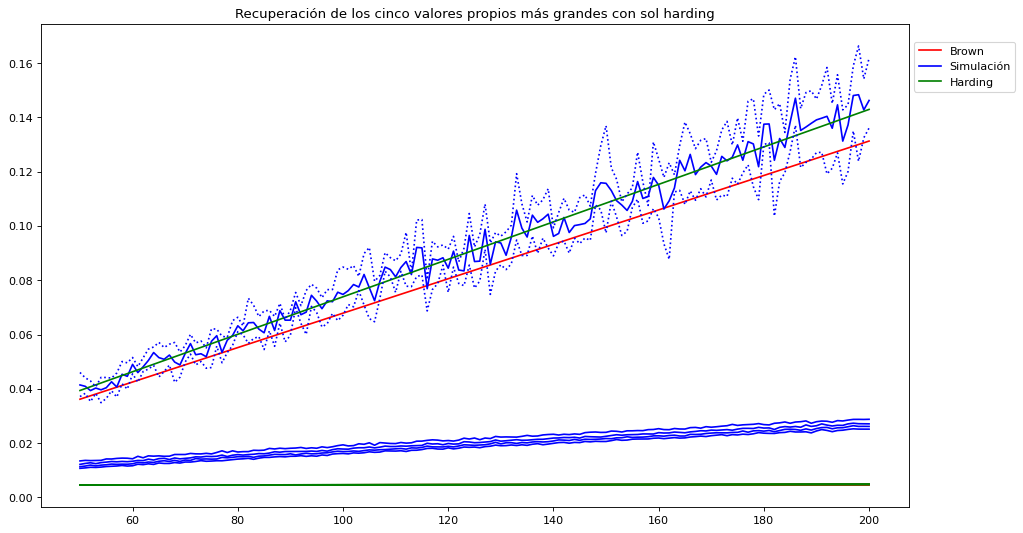

In [ ]:
figure(figsize=(14,8), dpi=80)
indix = 1
for ei in eigens_analitica:
    if indix == 1:
      plt.plot(p, ei, color = "red", label = "Brown")
    else:
      plt.plot(p, ei, color = "red")
    indix +=1
indix = 1
for ei in medias_eigen:
    
    if indix ==1:
      plt.plot(p, ei, color = "blue", label = "Simulación")
    else:
      plt.plot(p, ei, color = "blue")
    indix +=1
indix = 1
for ei in sol_harding:
  if indix == 1:
    plt.plot(p,ei,color="green", label = "Harding")
  else:
    plt.plot(p,ei,color="green")
  indix +=1
plt.plot(p,quantil_25,ls= "dotted", color ="blue")
plt.plot(p,quantil_75, ls = "dotted",color = "blue")
plt.title("Recuperación de los cinco valores propios más grandes con sol harding")
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

Para que esto suceda, matneniendo un valor de $p = 200$ y despejando entonces para el valor de $n$ sería necesario que se obtuvieran aproximadamente 40,500 observaciones 

In [ ]:
1/200 * (sig_e_cuad / (sig_f_cuad*sig_b_cuad))**2

40558.404101906744

Esto sería una gran cantidad de datos observados, lo que hace difícil recuperar los valores propios del 2 al 4 mediante este modelo de factores. Si por el contrario, se fija el número de observaciones en n = 80, entonces se obtiene que p tendría que ser de aproximadamente 101,396, lo cual claramente también es un número muy grande de activos para tener en el portafolio.

In [ ]:
1/80 * (sig_e_cuad / (sig_f_cuad*sig_b_cuad))**2

101396.01025476685